# Example: Solving Ordinary Differential Equations
downloaded from:
http://sam-dolan.staff.shef.ac.uk/mas212/notebooks/ <br>

### Dr Sam Dolan
Senior Lecturer in the School of Mathematics and Statistics at the University of Sheffield

In this notebook we will use Python to solve differential equations numerically.

In [1]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
# This makes the plots appear inside the notebook
%matplotlib inline

### First-order equations

Let's try a first-order ordinary differential equation (ODE), say:
$$\quad 
\frac{dy}{dx} + y = x, \quad \quad y(0) = 1.
$$
This has a closed-form solution
$$\quad
y = x - 1 + 2e^{-x}
$$
(Exercise: Show this, by first finding the integrating factor.)

We are going to solve this numerically.

First, let's import the "scipy" module and look at the help file for the relevant function, "integrate.odeint",

In [2]:
from scipy.integrate import odeint

# Define a function which calculates the derivative
def dy_dx(y, x):
    return x - y

xs = np.linspace(0,5,100)
y0 = 1.0  # the initial condition
ys = odeint(dy_dx, y0, xs)
ys = np.array(ys).flatten()

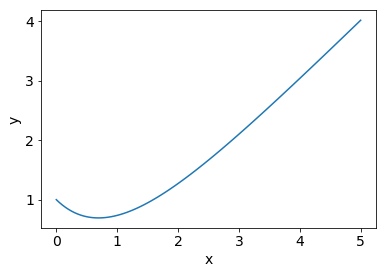

In [3]:
# Plot the numerical solution
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xs, ys);

Compare the numerical solution with the analytical solution by showing both on the same plot

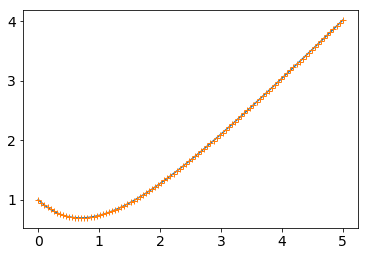

In [4]:
y_exact = xs - 1 + 2*np.exp(-xs)
y_difference = ys - y_exact
plt.plot(xs, ys, xs, y_exact, "+");

Now take a look at the difference between the two series:

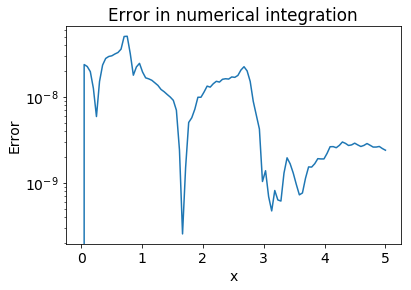

In [5]:
y_diff = np.abs(y_exact - ys)
plt.semilogy(xs, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.title("Error in numerical integration");
# Note the logarithmic scale on the y-axis. 

Exercise: Experiment with the options of "odeint" to improve the accuracy of the integration.

## Second-order ordinary differential equations

Suppose we have a second-order ODE such as a damped simple harmonic motion equation,
$$
\quad y'' + 2 y' + 2 y = \cos(2x), \quad \quad y(0) = 0, \; y'(0) = 0
$$
We can turn this into two first-order equations by defining a new depedent variable. For example,
$$
\quad z \equiv y' \quad \Rightarrow \quad z' + 2 z + 2y = \cos(2x), \quad z(0)=y(0) = 0.
$$
We can solve this system of ODEs using "odeint" with lists, as follows:

In [6]:
def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2*U[1] - 2*U[0] + np.cos(2*x)]
U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = odeint(dU_dx, U0, xs)
ys = Us[:,0]

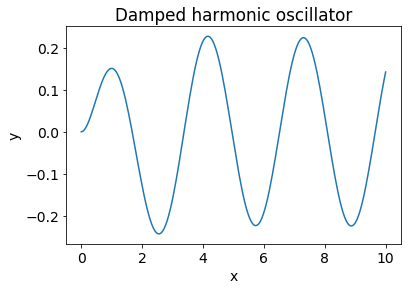

In [7]:
plt.xlabel("x")
plt.ylabel("y")
plt.title("Damped harmonic oscillator")
plt.plot(xs,ys);

## Predator-Prey Equations

Also known as <a href="http://en.wikipedia.org/wiki/Lotka-Volterra_equation">Lotka-Volterra equations</a>, the predator-prey equations are a pair of first-order non-linear ordinary differential equations. They represent a simplified model of the change in populations of two species which interact via predation. For example, foxes (predators) and rabbits (prey). Let $x$ and $y$ represent rabbit and fox populations, respectively. Then
\begin{align}
 \frac{dx}{dt} &= x (a - b y) \\
 \frac{dy}{dt} &= -y (c - d x) 
\end{align}
Here $a$, $b$, $c$ and $d$ are parameters, which are assumed to be positive. 

In [8]:
a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

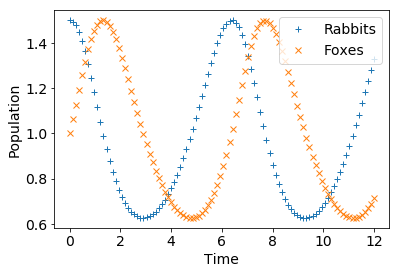

In [9]:
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

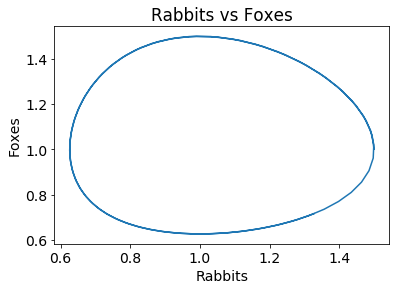

In [10]:
plt.plot(prey, predators, "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");

The plot above illustrates that the system is periodic. Let's plot a few more curves in the phase space.

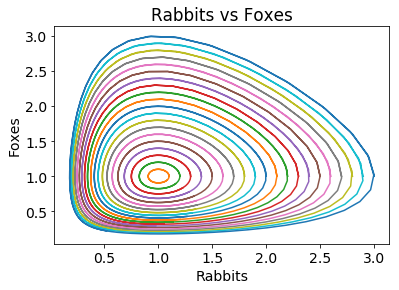

In [11]:
ic = np.linspace(1.0, 3.0, 21)
for r in ic:
    P0 = [r, 1.0]
    Ps = odeint(dP_dt, P0, ts)
    plt.plot(Ps[:,0], Ps[:,1], "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");